Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Examples 7.16 and 7.38

Analysis of hourly temperature data from 2015 at 134 weather stations in the United States\
Topics and relevant videos: [Sample mean](https://www.youtube.com/watch?v=snsP1OG3gQI), [sample variance, sample standard deviation](https://www.youtube.com/watch?v=4866Dz8haqs)

Author: Carlos Fernandez-Granda\
Data source: https://www1.ncdc.noaa.gov/pub/data/uscrn/products/

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

font_size = 15
font_size_ticks = 15

np.set_printoptions(precision=3)

file_name_temperature_2015 = "../data/weather/temperatures_2015.npy"
file_name_longitudes = "../data/weather/longitudes.npy"
file_name_latitudes = "../data/weather/latitudes.npy"

data_matrix = np.load(file_name_temperature_2015)
longitudes = np.load(file_name_longitudes)
latitudes = np.load(file_name_latitudes)

file_name_list = np.load('../data/weather/weather_station_names.npy')

def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

In [3]:
def remove_faulty_measurements(data,verbose):
    min_val = -100 # We assume temperatures cannot be lower than -100
    for ind in range(len(data)):
        if data[ind] < min_val:
            if verbose:
                print(str(ind) + ": " + str(data[ind]))
            aux_ind = ind-1
            while aux_ind > 0:
                if data[aux_ind] > min_val:
                    data[ind] = data[aux_ind]
                    if verbose:
                        print("entry " + str(aux_ind) + " changed to " + str(data[ind]))
                    break
                else:
                    ind -= 1
    return data

verbose = False
for ind in range(data_matrix.shape[1]):
    data_matrix[:,ind] = remove_faulty_measurements(data_matrix[:,ind],verbose)

In [4]:
means = np.mean(data_matrix,axis=0)
stds = np.std(data_matrix,axis=0)

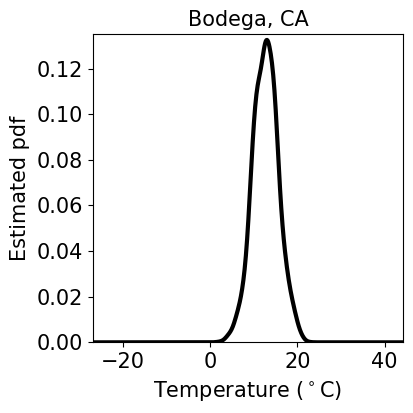

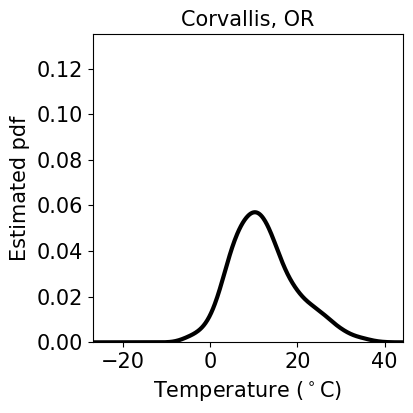

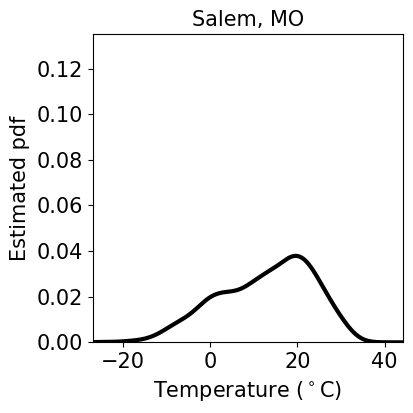

In [5]:
# Kernel density estimate of the pdfs of three stations with similar mean and very different standard deviation
font_size = 15
font_size_ticks = 15

bw_vals = [0.25]

xmin = np.min(data_matrix[:,66])
xmax = np.max(data_matrix[:,100])+5
x = np.linspace(xmin,xmax,500)
y_max = 0.135

def KDE_1D(data,x,bw=None):
    kernel = stats.gaussian_kde(data,bw_method=bw)
    kde = kernel(x)
    return kde

for index,bw in enumerate(bw_vals):
    kde = KDE_1D(data_matrix[:,24],x,bw=bw)
    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(x,kde,color="black",lw=3)
    plt.xlim([xmin,xmax])
    plt.ylim([0,y_max])
    plt.ylabel(r"Estimated pdf",fontsize=font_size,labelpad=5)
    plt.xlabel('Temperature ($^\circ$C)',fontsize=font_size,labelpad=5)
    plt.title("Bodega, CA",fontsize=font_size)
    
    kde = KDE_1D(data_matrix[:,100],x,bw=bw)
    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(x,kde,color="black",lw=3)
    plt.xlim([xmin,xmax])
    plt.ylim([0,y_max])
    plt.ylabel(r"Estimated pdf",fontsize=font_size,labelpad=5)
    plt.xlabel('Temperature ($^\circ$C)',fontsize=font_size,labelpad=5)
    plt.title("Corvallis, OR",fontsize=font_size)
    
    kde = KDE_1D(data_matrix[:,66],x,bw=bw)
    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(x,kde,color="black",lw=3)
    #sns.kdeplot(temperature_3,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
    plt.xlim([xmin,xmax])
    plt.ylim([0,y_max])
    plt.ylabel(r"Estimated pdf",fontsize=font_size,labelpad=5)
    plt.xlabel('Temperature ($^\circ$C)',fontsize=font_size,labelpad=5)
    plt.title("Salem, MO",fontsize=font_size);

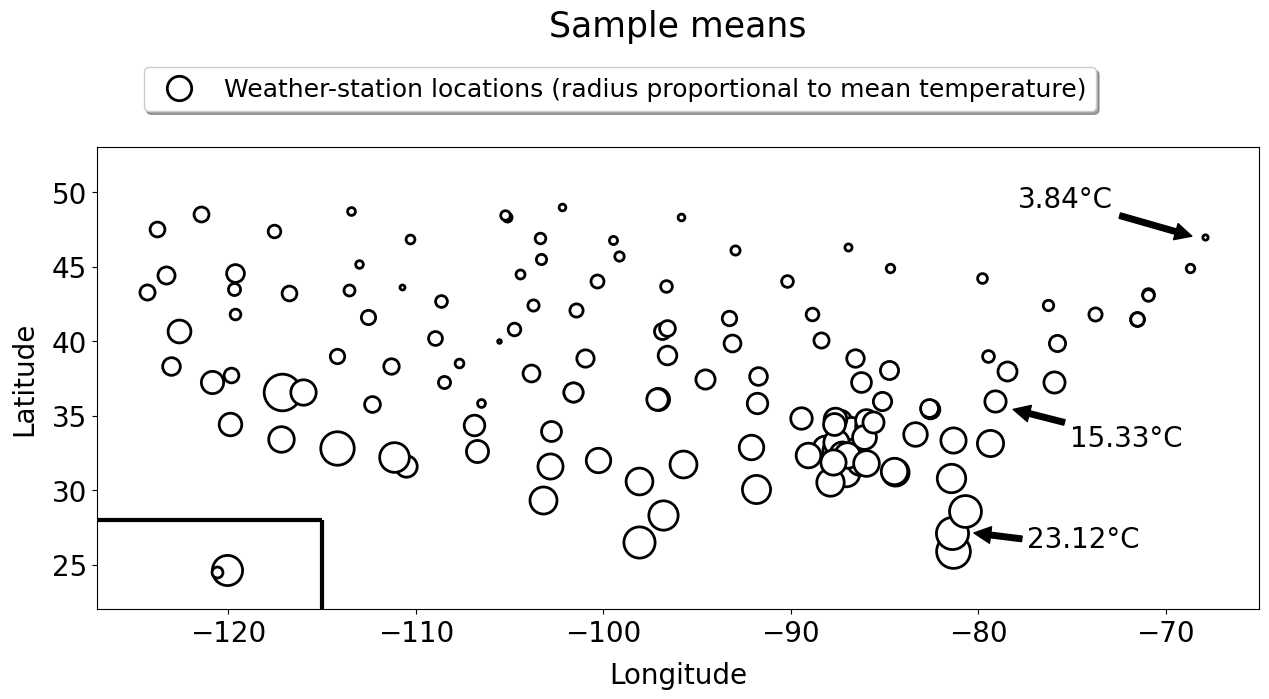

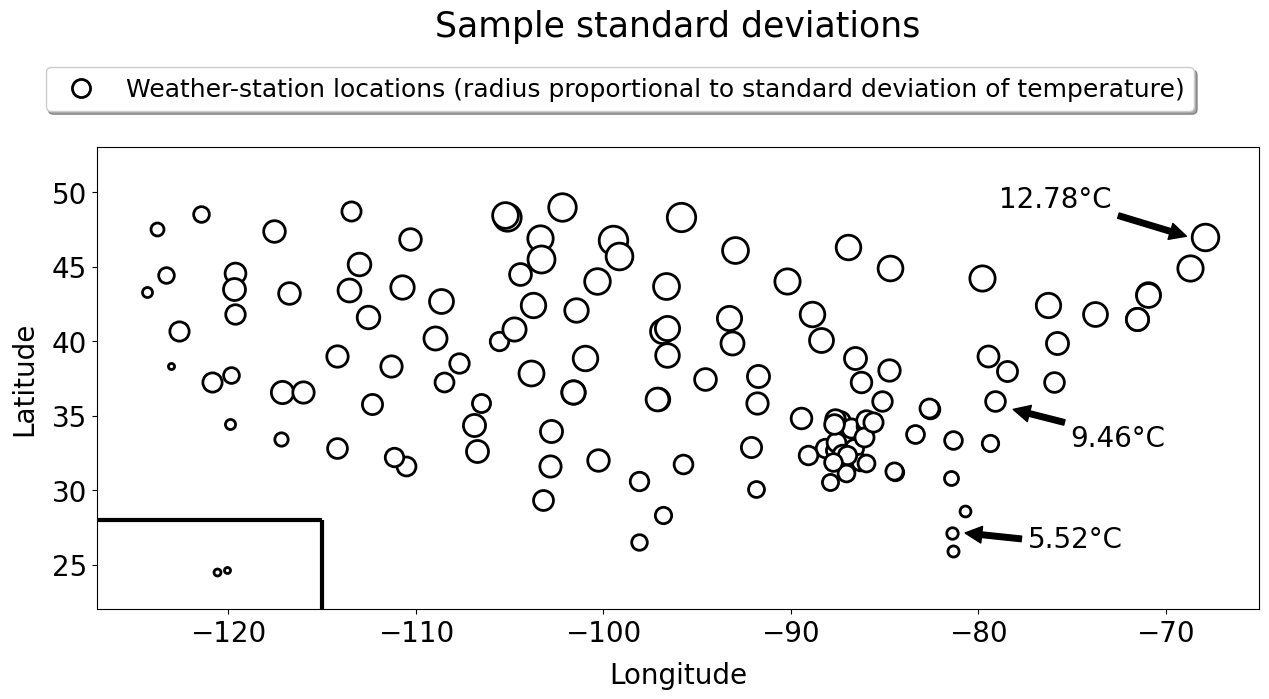

In [6]:
font_size = 25
font_size_ticks = 20

plt.figure(figsize=(15,6))
coeff_marker = 1
for ind in range(len(longitudes)):
    if longitudes[ind] < -150:
        plt.plot(longitudes[ind]+35,latitudes[ind]+5,'o',ms= coeff_marker * means[ind],markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white")
    else:
        if ind == 1:
            plt.plot(longitudes[ind],latitudes[ind],'o',ms= coeff_marker * means[ind],markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white",label="Weather-station locations (radius proportional to mean temperature)")
        else:
            plt.plot(longitudes[ind],latitudes[ind],'o',ms= coeff_marker * means[ind],
                     markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white")
text_inds = [38,58,76]
x_shift_1 = [1,-0.5,0.8]
y_shift_1 = [0,0,-0.5]
x_shift_2 = [4,-10,4]
y_shift_2 = [-1,2,-3]
for ind,ind_temp in enumerate(text_inds):
    # print(means[ind_temp])
    plt.annotate(str(np.round(means[ind_temp],2))+"°C",
            xy=(longitudes[ind_temp]+x_shift_1[ind],latitudes[ind_temp]+y_shift_1[ind]), xycoords='data',
            xytext=(longitudes[ind_temp]+x_shift_2[ind],latitudes[ind_temp]+y_shift_2[ind]),fontsize=font_size_ticks,
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim([22,53])
plt.xlim([-127,-65])
plt.vlines(-115,22,28,lw=3,color="black")
plt.hlines(28,-115,-127,lw=3,color="black")
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylabel('Latitude',fontsize=font_size_ticks,labelpad=10)
plt.xlabel('Longitude',fontsize=font_size_ticks,labelpad=10)
plt.legend(fontsize=font_size_ticks-2,loc='upper center', bbox_to_anchor=(0.45, 1.2),
          fancybox=True, shadow=True, ncol=1)
plt.title('Sample means',fontsize=font_size,pad=80)

plt.figure(figsize=(15,6))
coeff_marker = 1.5
for ind in range(len(longitudes)):
    if longitudes[ind] < -150:
        plt.plot(longitudes[ind]+35,latitudes[ind]+5,'o',ms= coeff_marker * stds[ind],markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white")
    else:
        if ind == 1:
            plt.plot(longitudes[ind],latitudes[ind],'o',ms= coeff_marker * stds[ind],markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white",label="Weather-station locations (radius proportional to standard deviation of temperature)")
        else:
            plt.plot(longitudes[ind],latitudes[ind],'o',ms= coeff_marker * stds[ind],
                     markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white")
text_inds = [38,58,76]
x_shift_1 = [0.5,-0.8,0.8]
y_shift_1 = [0,0,-0.5]
x_shift_2 = [4,-11,4]
y_shift_2 = [-1,2,-3]
for ind,ind_temp in enumerate(text_inds):
    # print(file_name_list[ind_temp])
    # print(stds[ind_temp])
    plt.annotate(str(np.round(stds[ind_temp],2))+"°C",
            xy=(longitudes[ind_temp]+x_shift_1[ind],latitudes[ind_temp]+y_shift_1[ind]), xycoords='data',
            xytext=(longitudes[ind_temp]+x_shift_2[ind],latitudes[ind_temp]+y_shift_2[ind]),fontsize=font_size_ticks,
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim([22,53])
plt.xlim([-127,-65])
plt.vlines(-115,22,28,lw=3,color="black")
plt.hlines(28,-115,-127,lw=3,color="black")
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylabel('Latitude',fontsize=font_size_ticks,labelpad=10)
plt.xlabel('Longitude',fontsize=font_size_ticks,labelpad=10)
plt.legend(fontsize=font_size_ticks-2,loc='upper center', bbox_to_anchor=(0.45, 1.2),
          fancybox=True, shadow=True, ncol=1)
plt.title('Sample standard deviations',fontsize=font_size,pad=80);